In [1]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=555816349d664c8d91acc1c80b336f4415727c25487faa41f00fe36a234305e3
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns

In [35]:
adata = sc.read_csv("/content/GSM5226574_C51ctr_raw_counts.csv", first_column_names=True).T

In [36]:
adata.X.shape

(6099, 34546)

Quality control and Doublet Remover

In [17]:
!pip install scvi-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
 

In [18]:
import scvi

In [37]:
sc.pp.filter_genes(adata, min_cells = 10)

In [41]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='cell_ranger')

In [42]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


In [43]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.350. Signaling Trainer to stop.


In [44]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)
df.index = df.index.map(lambda x: x[:-2])
df

/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


doublet   singlet prediction
TAGGTACCATGGCCAC-1  0.831303  0.168697    doublet
ATTCACTGTAACAGGC-1  0.845182  0.154818    doublet
TAACTTCCAACCACGC-1  0.691180  0.308821    doublet
TTGGGTACACGACAAG-1  0.791078  0.208922    doublet
AGGCCACAGAGTCACG-1  0.808287  0.191713    doublet
...                      ...       ...        ...
CGCCATTGTTTGCCGG-1  0.414577  0.585423    singlet
CACTGGGGTCTACGTA-1  0.000190  0.999810    singlet
CATACTTGTAGAGGAA-1  0.000575  0.999425    singlet
TTTGGTTTCCACGGAC-1  0.029113  0.970887    singlet
ATGCATGAGTCATGAA-1  0.000609  0.999391    singlet

[6099 rows x 3 columns]

In [45]:
df.groupby('prediction').count()

doublet  singlet
prediction                  
doublet        1873     1873
singlet        4226     4226

In [46]:
df['dif'] = df.doublet - df.singlet
df

doublet   singlet prediction       dif
TAGGTACCATGGCCAC-1  0.831303  0.168697    doublet  0.662606
ATTCACTGTAACAGGC-1  0.845182  0.154818    doublet  0.690365
TAACTTCCAACCACGC-1  0.691180  0.308821    doublet  0.382359
TTGGGTACACGACAAG-1  0.791078  0.208922    doublet  0.582156
AGGCCACAGAGTCACG-1  0.808287  0.191713    doublet  0.616574
...                      ...       ...        ...       ...
CGCCATTGTTTGCCGG-1  0.414577  0.585423    singlet -0.170846
CACTGGGGTCTACGTA-1  0.000190  0.999810    singlet -0.999619
CATACTTGTAGAGGAA-1  0.000575  0.999425    singlet -0.998850
TTTGGTTTCCACGGAC-1  0.029113  0.970887    singlet -0.941774
ATGCATGAGTCATGAA-1  0.000609  0.999391    singlet -0.998783

[6099 rows x 4 columns]

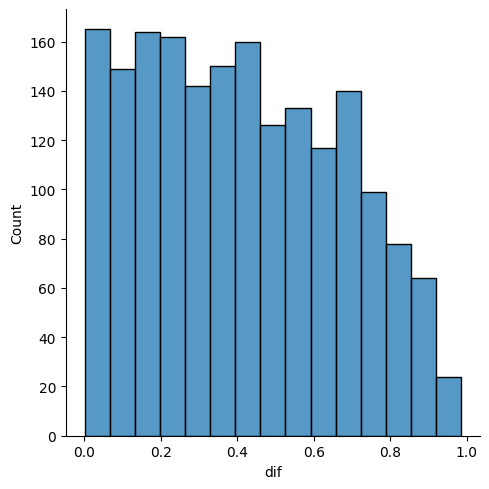

In [47]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [50]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

Empty DataFrame
Columns: [doublet, singlet, prediction, dif]
Index: []

In [51]:
adata = sc.read_csv("/content/GSM5226574_C51ctr_raw_counts.csv", first_column_names=True).T

In [52]:
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)

In [53]:
adata.obs

doublet
TAGGTACCATGGCCAC-1_1    False
ATTCACTGTAACAGGC-1_1    False
TAACTTCCAACCACGC-1_1    False
TTGGGTACACGACAAG-1_1    False
AGGCCACAGAGTCACG-1_1    False
...                       ...
CGCCATTGTTTGCCGG-1_1    False
CACTGGGGTCTACGTA-1_1    False
CATACTTGTAGAGGAA-1_1    False
TTTGGTTTCCACGGAC-1_1    False
ATGCATGAGTCATGAA-1_1    False

[6099 rows x 1 columns]

In [55]:
adata = adata[~adata.obs.doublet]
adata

View of AnnData object with n_obs × n_vars = 6099 × 34546
    obs: 'doublet'

In [56]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')

<ipython-input-56-bf40765c0380>:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


In [57]:
adata.var

mt
AL627309.1  False
AL627309.5  False
AL627309.4  False
AL669831.2  False
LINC01409   False
...           ...
VN1R2       False
AL031676.1  False
SMIM34A     False
AL050402.1  False
AL445072.1  False

[34546 rows x 1 columns]

In [58]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [59]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

0
0          FAU
1       MRPL13
2        RPL10
3       RPL10A
4       RPL10L
..         ...
83        RPS9
84        RPSA
85     RSL24D1
86  RSL24D1P11
87       UBA52

[88 rows x 1 columns]

In [60]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
adata.obs

doublet
TAGGTACCATGGCCAC-1_1    False
ATTCACTGTAACAGGC-1_1    False
TAACTTCCAACCACGC-1_1    False
TTGGGTACACGACAAG-1_1    False
AGGCCACAGAGTCACG-1_1    False
...                       ...
CGCCATTGTTTGCCGG-1_1    False
CACTGGGGTCTACGTA-1_1    False
CATACTTGTAGAGGAA-1_1    False
TTTGGTTTCCACGGAC-1_1    False
ATGCATGAGTCATGAA-1_1    False

[6099 rows x 1 columns]

In [61]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [62]:
adata.var.sort_values('n_cells_by_counts')

mt   ribo  n_cells_by_counts  mean_counts  \
AL445072.1  False  False                  0     0.000000   
AC073270.1  False  False                  0     0.000000   
AC073349.5  False  False                  0     0.000000   
AC005482.1  False  False                  0     0.000000   
SPDYE8P     False  False                  0     0.000000   
...           ...    ...                ...          ...   
AKAP13      False  False               4458     3.054271   
NEAT1       False  False               4546     5.314150   
MBNL1       False  False               4554     2.877029   
ZBTB20      False  False               4699     2.601082   
MALAT1      False  False               6090    69.016563   

            pct_dropout_by_counts  total_counts  
AL445072.1             100.000000           0.0  
AC073270.1             100.000000           0.0  
AC073349.5             100.000000           0.0  
AC005482.1             100.000000           0.0  
SPDYE8P                100.000000           0.0  
...                           ...           ...  
AKAP13                  26.906050       18628.0  
NEAT1                   25.463191       32411.0  
MBNL1                   25.332022       17547.0  
ZBTB20                  22.954583       15864.0  
MALAT1                   0.147565      420932.0  

[34546 rows x 6 columns]

In [64]:
sc.pp.filter_genes(adata, min_cells=5)

In [65]:
adata.var.sort_values('n_cells_by_counts')

mt   ribo  n_cells_by_counts  mean_counts  \
LINC02570    False  False                  5     0.000820   
CNTNAP4      False  False                  5     0.000984   
RPS6KA2-IT1  False  False                  5     0.000820   
HP           False  False                  5     0.000820   
AC138625.1   False  False                  5     0.000820   
...            ...    ...                ...          ...   
AKAP13       False  False               4458     3.054271   
NEAT1        False  False               4546     5.314150   
MBNL1        False  False               4554     2.877029   
ZBTB20       False  False               4699     2.601082   
MALAT1       False  False               6090    69.016563   

             pct_dropout_by_counts  total_counts  n_cells  
LINC02570                99.918019           5.0        5  
CNTNAP4                  99.918019           6.0        5  
RPS6KA2-IT1              99.918019           5.0        5  
HP                       99.918019           5.0        5  
AC138625.1               99.918019           5.0        5  
...                            ...           ...      ...  
AKAP13                   26.906050       18628.0     4458  
NEAT1                    25.463191       32411.0     4546  
MBNL1                    25.332022       17547.0     4554  
ZBTB20                   22.954583       15864.0     4699  
MALAT1                    0.147565      420932.0     6090  

[22627 rows x 7 columns]

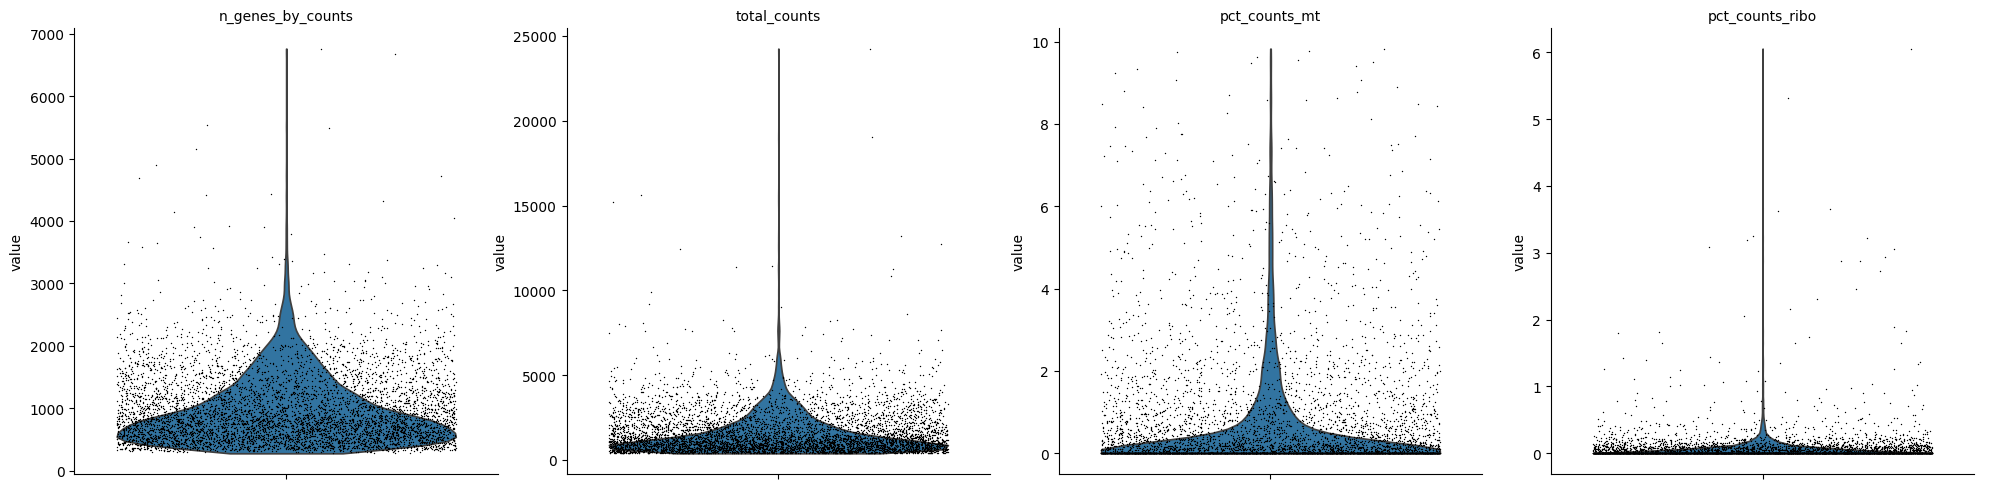

In [67]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], jitter=0.4, multi_panel=True)

In [68]:
set_upper_Lim= 2500
adata = adata[adata.obs.n_genes_by_counts < set_upper_Lim]
adata.obs

doublet  n_genes_by_counts  total_counts  \
CGTTCTGGTACTAGCT-1_1    False               2434        6047.0   
CTGGCAGGTTCGGTAT-1_1    False               2444        5899.0   
ACACCAACACAACGCC-1_1    False               2451        5497.0   
CCTCAACCATACAGGG-1_1    False               2276        5434.0   
ACAAAGATCCACAGGC-1_1    False               2310        5504.0   
...                       ...                ...           ...   
CGCCATTGTTTGCCGG-1_1    False                355         410.0   
CACTGGGGTCTACGTA-1_1    False                346         403.0   
CATACTTGTAGAGGAA-1_1    False                360         410.0   
TTTGGTTTCCACGGAC-1_1    False                299         405.0   
ATGCATGAGTCATGAA-1_1    False                351         411.0   

                      total_counts_mt  pct_counts_mt  total_counts_ribo  \
CGTTCTGGTACTAGCT-1_1              6.0       0.099223                1.0   
CTGGCAGGTTCGGTAT-1_1            307.0       5.204272                5.0   
ACACCAACACAACGCC-1_1              0.0       0.000000                3.0   
CCTCAACCATACAGGG-1_1             38.0       0.699301                0.0   
ACAAAGATCCACAGGC-1_1              1.0       0.018169                1.0   
...                               ...            ...                ...   
CGCCATTGTTTGCCGG-1_1              3.0       0.731707                0.0   
CACTGGGGTCTACGTA-1_1              0.0       0.000000                0.0   
CATACTTGTAGAGGAA-1_1              2.0       0.487805                0.0   
TTTGGTTTCCACGGAC-1_1              0.0       0.000000                2.0   
ATGCATGAGTCATGAA-1_1              0.0       0.000000                0.0   

                      pct_counts_ribo  
CGTTCTGGTACTAGCT-1_1         0.016537  
CTGGCAGGTTCGGTAT-1_1         0.084760  
ACACCAACACAACGCC-1_1         0.054575  
CCTCAACCATACAGGG-1_1         0.000000  
ACAAAGATCCACAGGC-1_1         0.018169  
...                               ...  
CGCCATTGTTTGCCGG-1_1         0.000000  
CACTGGGGTCTACGTA-1_1         0.000000  
CATACTTGTAGAGGAA-1_1         0.000000  
TTTGGTTTCCACGGAC-1_1         0.493827  
ATGCATGAGTCATGAA-1_1         0.000000  

[5982 rows x 7 columns]

In [69]:
adata = adata[adata.obs.pct_counts_mt < 25]
adata = adata[adata.obs.pct_counts_ribo < 2]

#Normalization

In [73]:
sc.pp.normalize_total(adata, target_sum=1e4)

#Clustering

In [84]:
sc.pp.highly_variable_genes(adata, n_top_genes=2500, flavor='cell_ranger')

In [85]:
adata.var

mt   ribo  n_cells_by_counts  mean_counts  \
CPTP        False  False                 20     0.003279   
AL391244.2  False  False                  6     0.000984   
VWA1        False  False                  5     0.000820   
AL645728.1  False  False                  7     0.001148   
FNDC10      False  False                  5     0.000820   
...           ...    ...                ...          ...   
MT-ND4L      True  False                650     0.191671   
MT-ND4       True  False               1328     0.833087   
MT-ND5       True  False                886     0.332514   
MT-ND6       True  False                821     0.383178   
MT-CYB       True  False               1295     0.622397   

            pct_dropout_by_counts  total_counts  n_cells  highly_variable  \
CPTP                    99.672077          20.0       20             True   
AL391244.2              99.901623           6.0        6             True   
VWA1                    99.918019           5.0        5             True   
AL645728.1              99.885227           7.0        7             True   
FNDC10                  99.918019           5.0        5             True   
...                           ...           ...      ...              ...   
MT-ND4L                 89.342515        1169.0      650             True   
MT-ND4                  78.225939        5081.0     1328             True   
MT-ND5                  85.473028        2028.0      886             True   
MT-ND6                  86.538777        2337.0      821             True   
MT-CYB                  78.767011        3796.0     1295             True   

                means  dispersions  dispersions_norm  
CPTP         0.203682   104.520944          0.746331  
AL391244.2   0.047736    90.233830          0.768187  
VWA1         0.022475    54.254775         -0.747447  
AL645728.1   0.038722    95.694789          0.998232  
FNDC10       0.026086    59.673130         -0.519196  
...               ...          ...               ...  
MT-ND4L      4.947779    77.411951         -0.559139  
MT-ND4      18.998135   136.961106         -0.573460  
MT-ND5       8.353718    86.307207         -0.622020  
MT-ND6       8.660285   111.746904          0.209726  
MT-CYB      17.075424   128.250172         -0.042844  

[2000 rows x 11 columns]

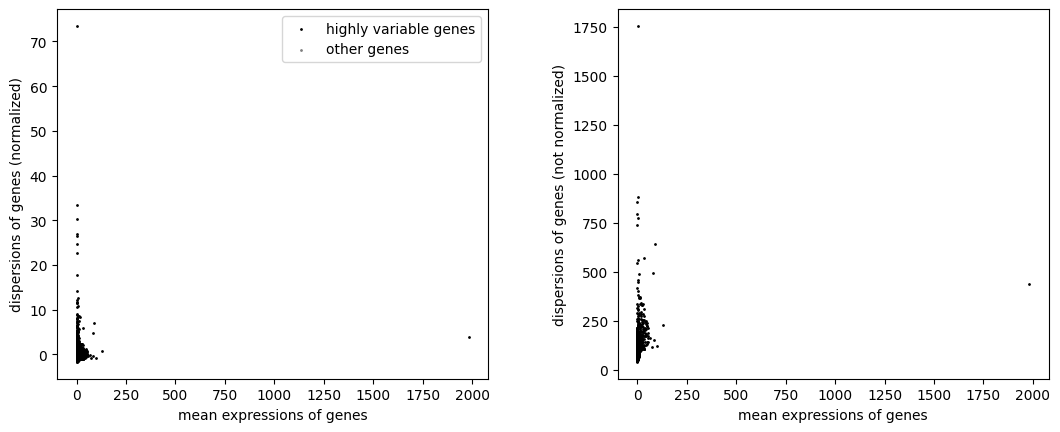

In [86]:
sc.pl.highly_variable_genes(adata)

In [87]:
adata = adata[:, adata.var.highly_variable]

In [88]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:672: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [89]:
sc.pp.scale(adata, max_value=10)

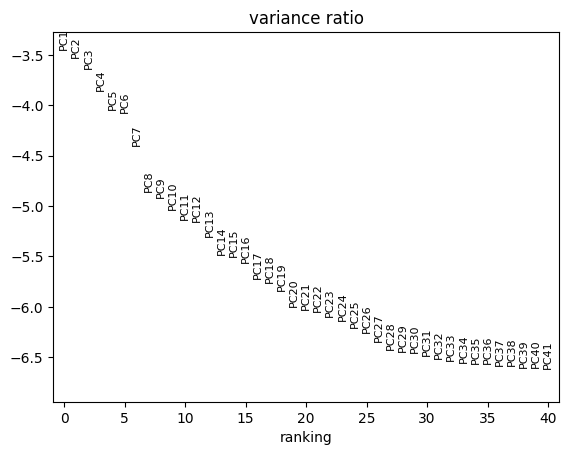

In [90]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 40)

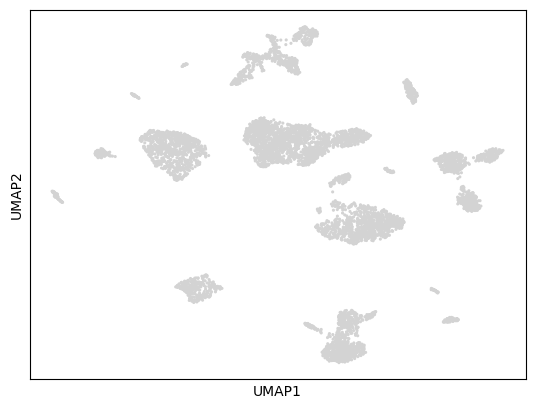

In [91]:
sc.pp.neighbors(adata, n_pcs = 30)
sc.tl.umap(adata)
sc.pl.umap(adata)

In [92]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.5 MB/s eta 0:00:00


In [95]:
sc.tl.leiden(adata, resolution = 1)

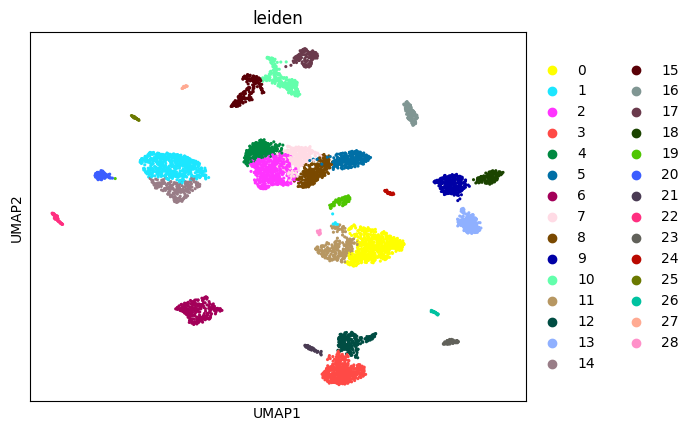

In [96]:
sc.pl.umap(adata, color=['leiden'])

Annotation and Finding Markers

In [97]:
sc.tl.rank_genes_groups(adata, 'leiden')

/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

In [98]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

group       names     scores  logfoldchanges         pvals     pvals_adj
539       0       NELL1  -2.050993        0.660709  4.031471e-02  4.955712e-02
540       0  AC006148.1  -2.058348        0.571219  3.960382e-02  4.874316e-02
541       0        XACT  -2.059737        0.659425  3.947031e-02  4.860876e-02
542       0       GALR1  -2.071101        0.619446  3.839522e-02  4.734305e-02
543       0       CLVS1  -2.078160        0.985435  3.774102e-02  4.659386e-02
...     ...         ...        ...             ...           ...           ...
57995    28        RPGR -23.181530        7.332664  3.440617e-57  3.440617e-54
57996    28      DIPK1A -24.296608        7.642641  9.726928e-38  1.215866e-35
57997    28  AL365295.1 -24.594744        7.240794  7.373629e-50  2.457876e-47
57998    28        ERN1 -24.742363        6.643814  1.122160e-20  2.877332e-19
57999    28      OSBPL3 -27.791147        7.528632  8.527302e-26  3.707522e-24

[25656 rows x 6 columns]

In [103]:
vae.adata = adata

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


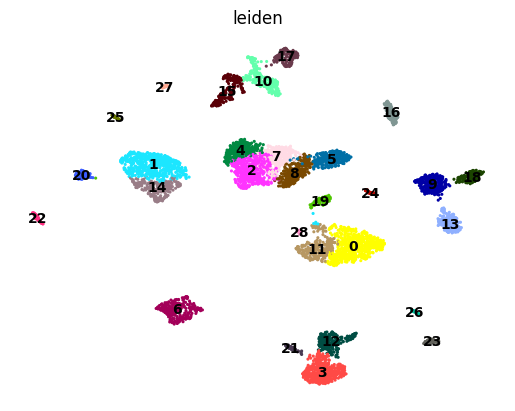

In [106]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

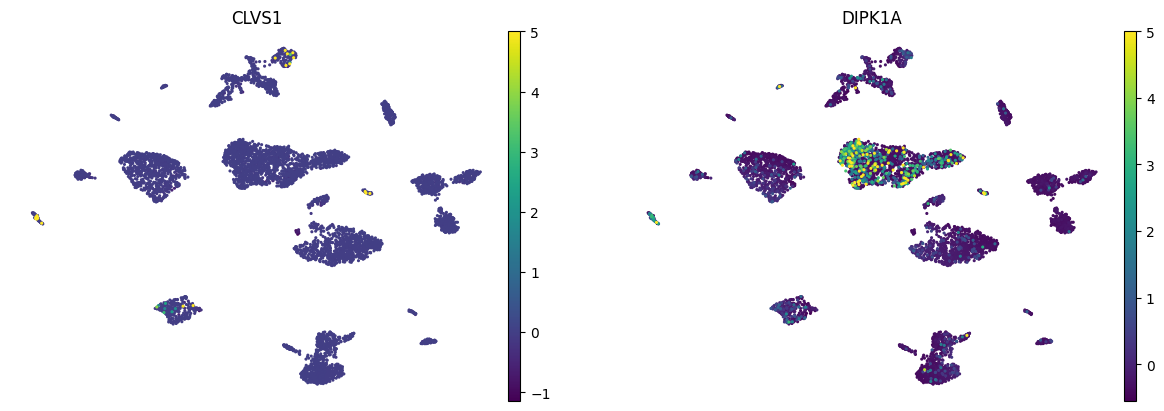

In [114]:
sc.pl.umap(adata, color = ['CLVS1', 'DIPK1A'], frameon = False, layer = 'X', vmax = 5)

In [115]:
cell_type = {"0":"Macrophage",
"1":"Fibroblast",
"2":"CD4+ T-cell",
"3":"AT2",
"4":"AT1",
"5":"CD8+ T-cell",
"6":"Endothelial cell",
"7":"Plasma cell",
"8":"Macrophage",
"9":"AT2",
"10":"Fibroblast",
"11":"Fibroblast",
"12":"Macrophage",
"13":"Macrophage",
"14":"Airway epithelial",
"15":"Airway epithelial",
"16":"Monocyte",
"17":"Airway epithelial",
"18":"B-cell",
"19":"Aerocyte",
"20":"Airway epithelial",
"21":"Smooth muscle cell",
"22":"Cycling T/NK",
"23":"Neuronal cell",
"24":"Denditic cell",
"25":"Pericyte",
"26":"Fibroblast",
"27":"Erythroid-like",
"28":"Macrophage"
}

In [116]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

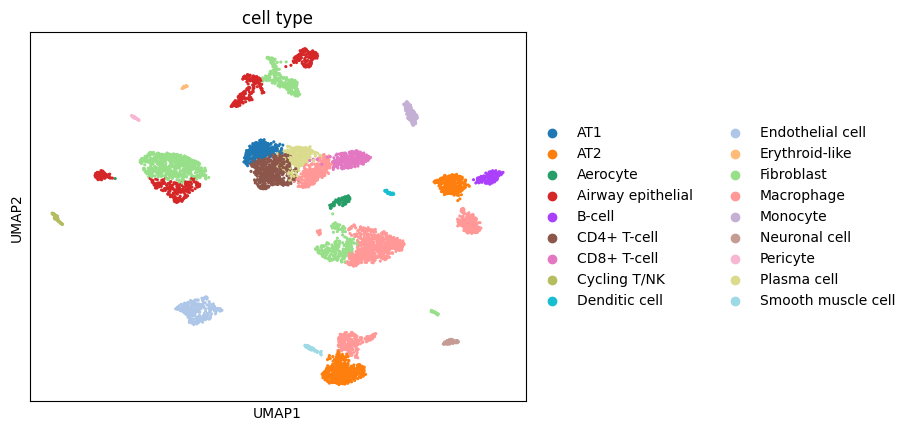

In [119]:
sc.pl.umap(adata, color = ['cell type'], frameon = True)

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1294: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  warnings.warn(


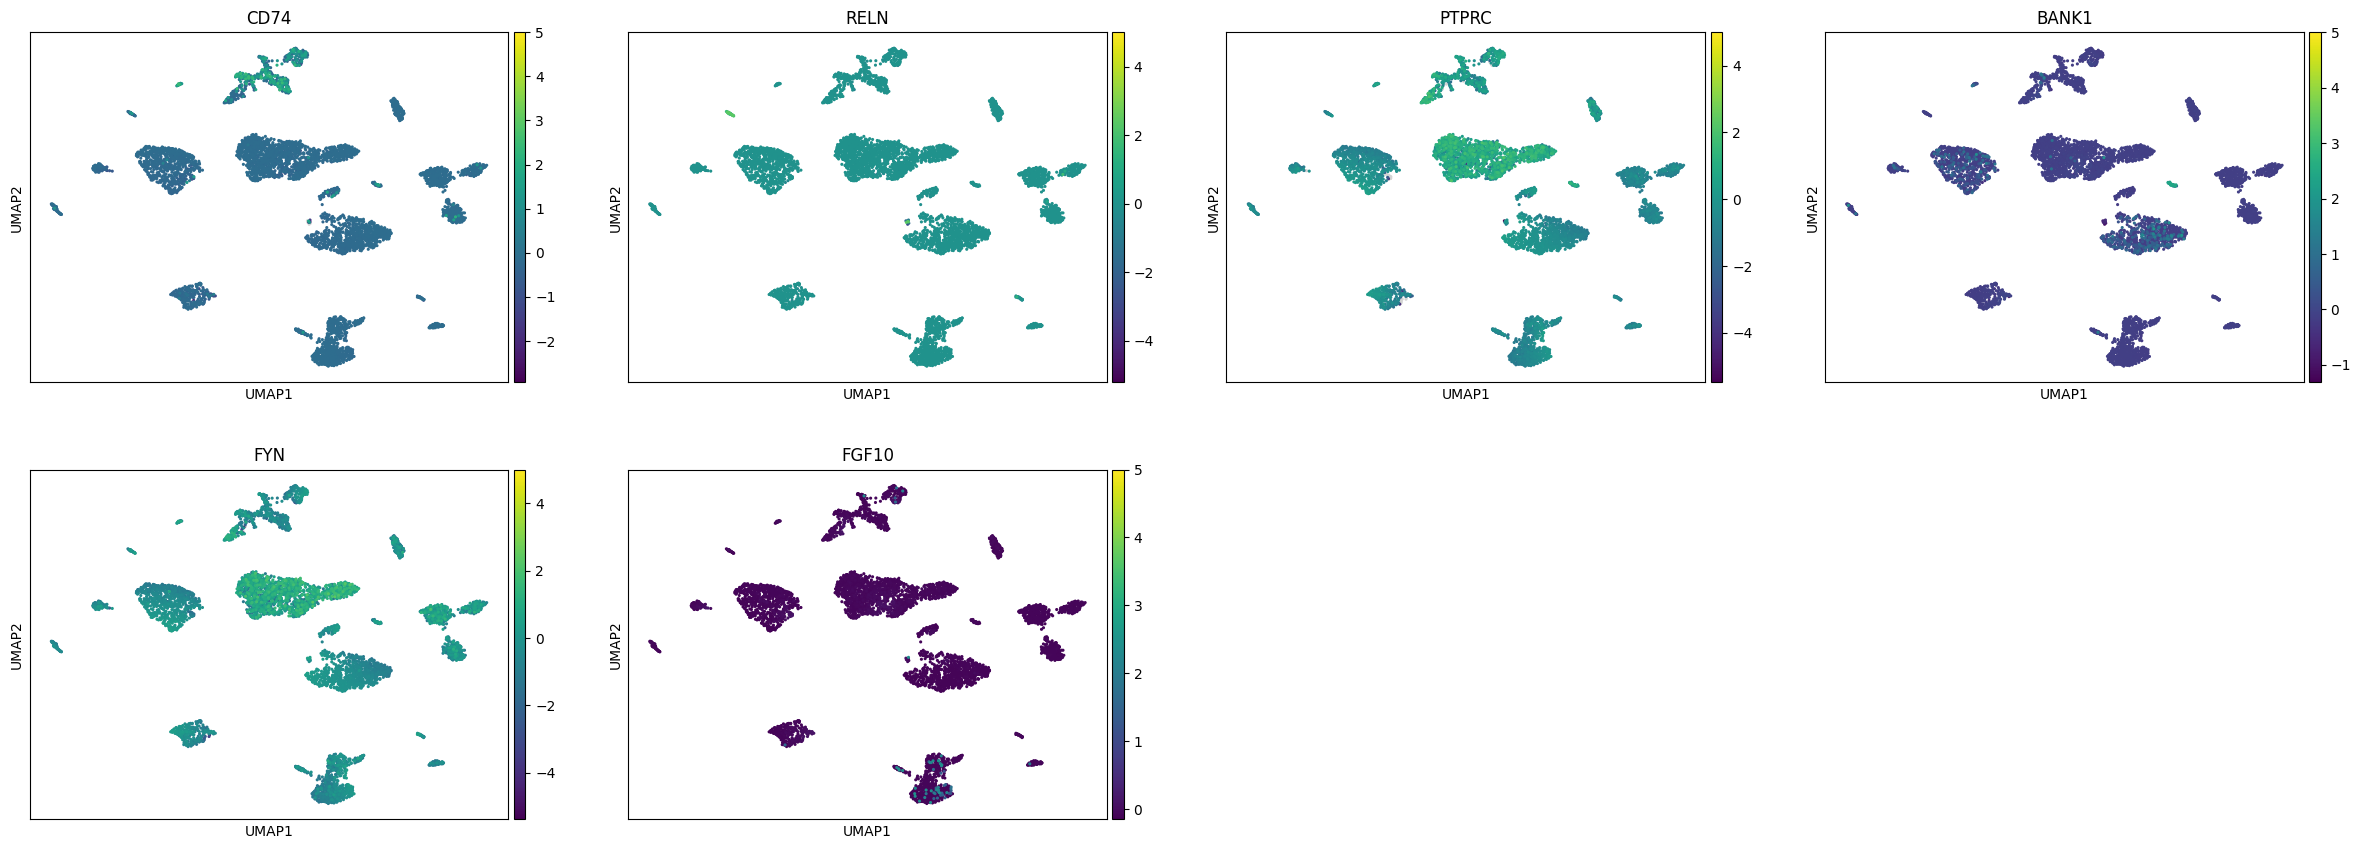

In [198]:
sc.pl.umap(adata,
           color=['CD74', 'RELN', 'PTPRC', 'BANK1', 'FYN', 'FGF10'],
           frameon= True,
           layer='X',
           vmax=5)


In [120]:
#Cell type Count Anlysis
cell_type_counts = adata.obs['cell type'].value_counts()

In [122]:
cell_type_percentages = cell_type_counts / cell_type_counts.sum() * 100
cell_type_percentages

cell type
Macrophage            22.212909
Fibroblast            18.390612
AT2                   12.103940
Airway epithelial     10.192791
CD4+ T-cell            8.130763
AT1                    5.012573
CD8+ T-cell            4.660520
Endothelial cell       4.492875
Plasma cell            4.476111
Monocyte               2.514669
B-cell                 2.011735
Aerocyte               1.508801
Smooth muscle cell     1.039396
Cycling T/NK           0.938810
Neuronal cell          0.838223
Denditic cell          0.620285
Pericyte               0.519698
Erythroid-like         0.335289
Name: count, dtype: float64

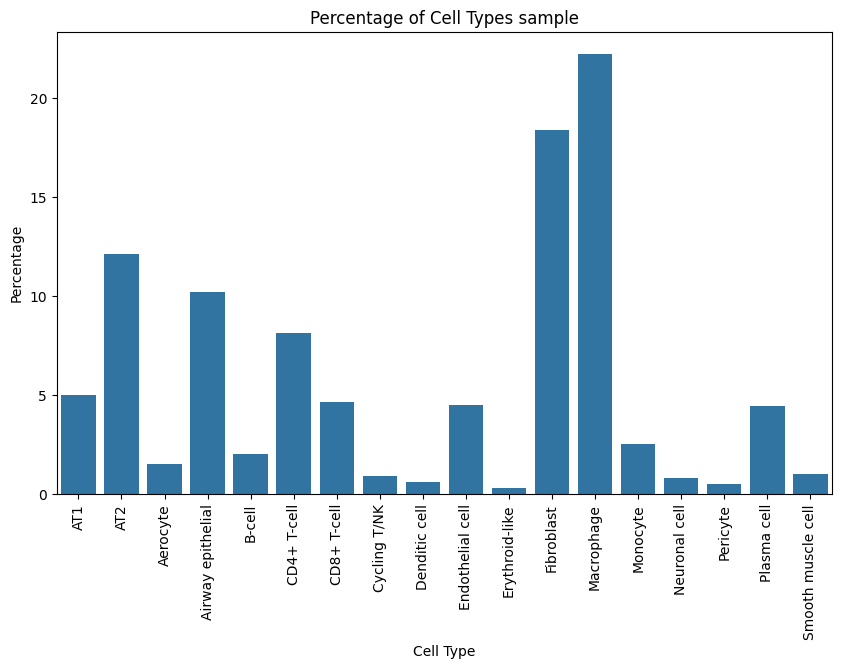

In [129]:
Figure = plt.figure(figsize=(10, 6))
sns.barplot(x = cell_type_percentages.index, y = cell_type_percentages)
plt.ylabel('Percentage')
plt.xlabel('Cell Type')
plt.title('Percentage of Cell Types sample')
plt.xticks(rotation=90)
plt.show()

In [137]:
if 'log1p' not in adata.uns_keys():
    sc.pp.log1p(adata)
# Perform DE analysis
sc.tl.rank_genes_groups(adata, groupby='cell type', method='wilcoxon')
# View top DE genes for each group
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:383: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encou

AT1     AT2  Aerocyte Airway epithelial B-cell CD4+ T-cell  \
0  LINC02694   MACF1      SDK1        AC103794.1  PTPRB    ARHGAP15   
1      SKAP1     FN1    BPIFB1        AL049838.1  PTPRM       SKAP1   
2      PARP8   PTPRG        CP         MEIS1-AS3   LDB2       PARP8   
3     THEMIS  LPCAT2  AQP4-AS1              PI15   LIFR       IKZF1   
4      IKZF1  RUBCNL     CHST9        AC009271.1  PTPRG  AP001341.1   

  CD8+ T-cell Cycling T/NK Denditic cell Endothelial cell Erythroid-like  \
0       CD247      CREB3L2         BANK1           CFAP43          WDFY4   
1        AOAH      POU2AF1          AFF3           DNAH12          HDAC9   
2       PRKCH     IFNG-AS1       RALGPS2            CDHR3           CPVL   
3      IQGAP2         GNG7        MARCH1              RP1           FLT3   
4        ZEB2        IGHA1      ARHGAP15           SPAG17           CLNK   

  Fibroblast Macrophage    Monocyte Neuronal cell Pericyte Plasma cell  \
0        CPM     SPTBN1     SLC24A3        SORBS1  PKHD1L1        AOAH   
1      NEAT1      RBMS3         KIT        SYNPO2    TSHZ2       FGF10   
2      LRMDA    KHDRBS2      IL18R1        PRUNE2    ZFPM2   LINC01338   
3      CSF1R       EMP2       BMP2K         MYH11     RELN        FOSB   
4      SNX25       ROR1  AL390957.1         PRKG1    KALRN      HS6ST3   

  Smooth muscle cell  
0              FGF14  
1               SOX5  
2              PRKG1  
3              LAMA2  
4              PTPRG

In [138]:
top_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)
top_genes_list = top_genes.values.flatten().tolist()

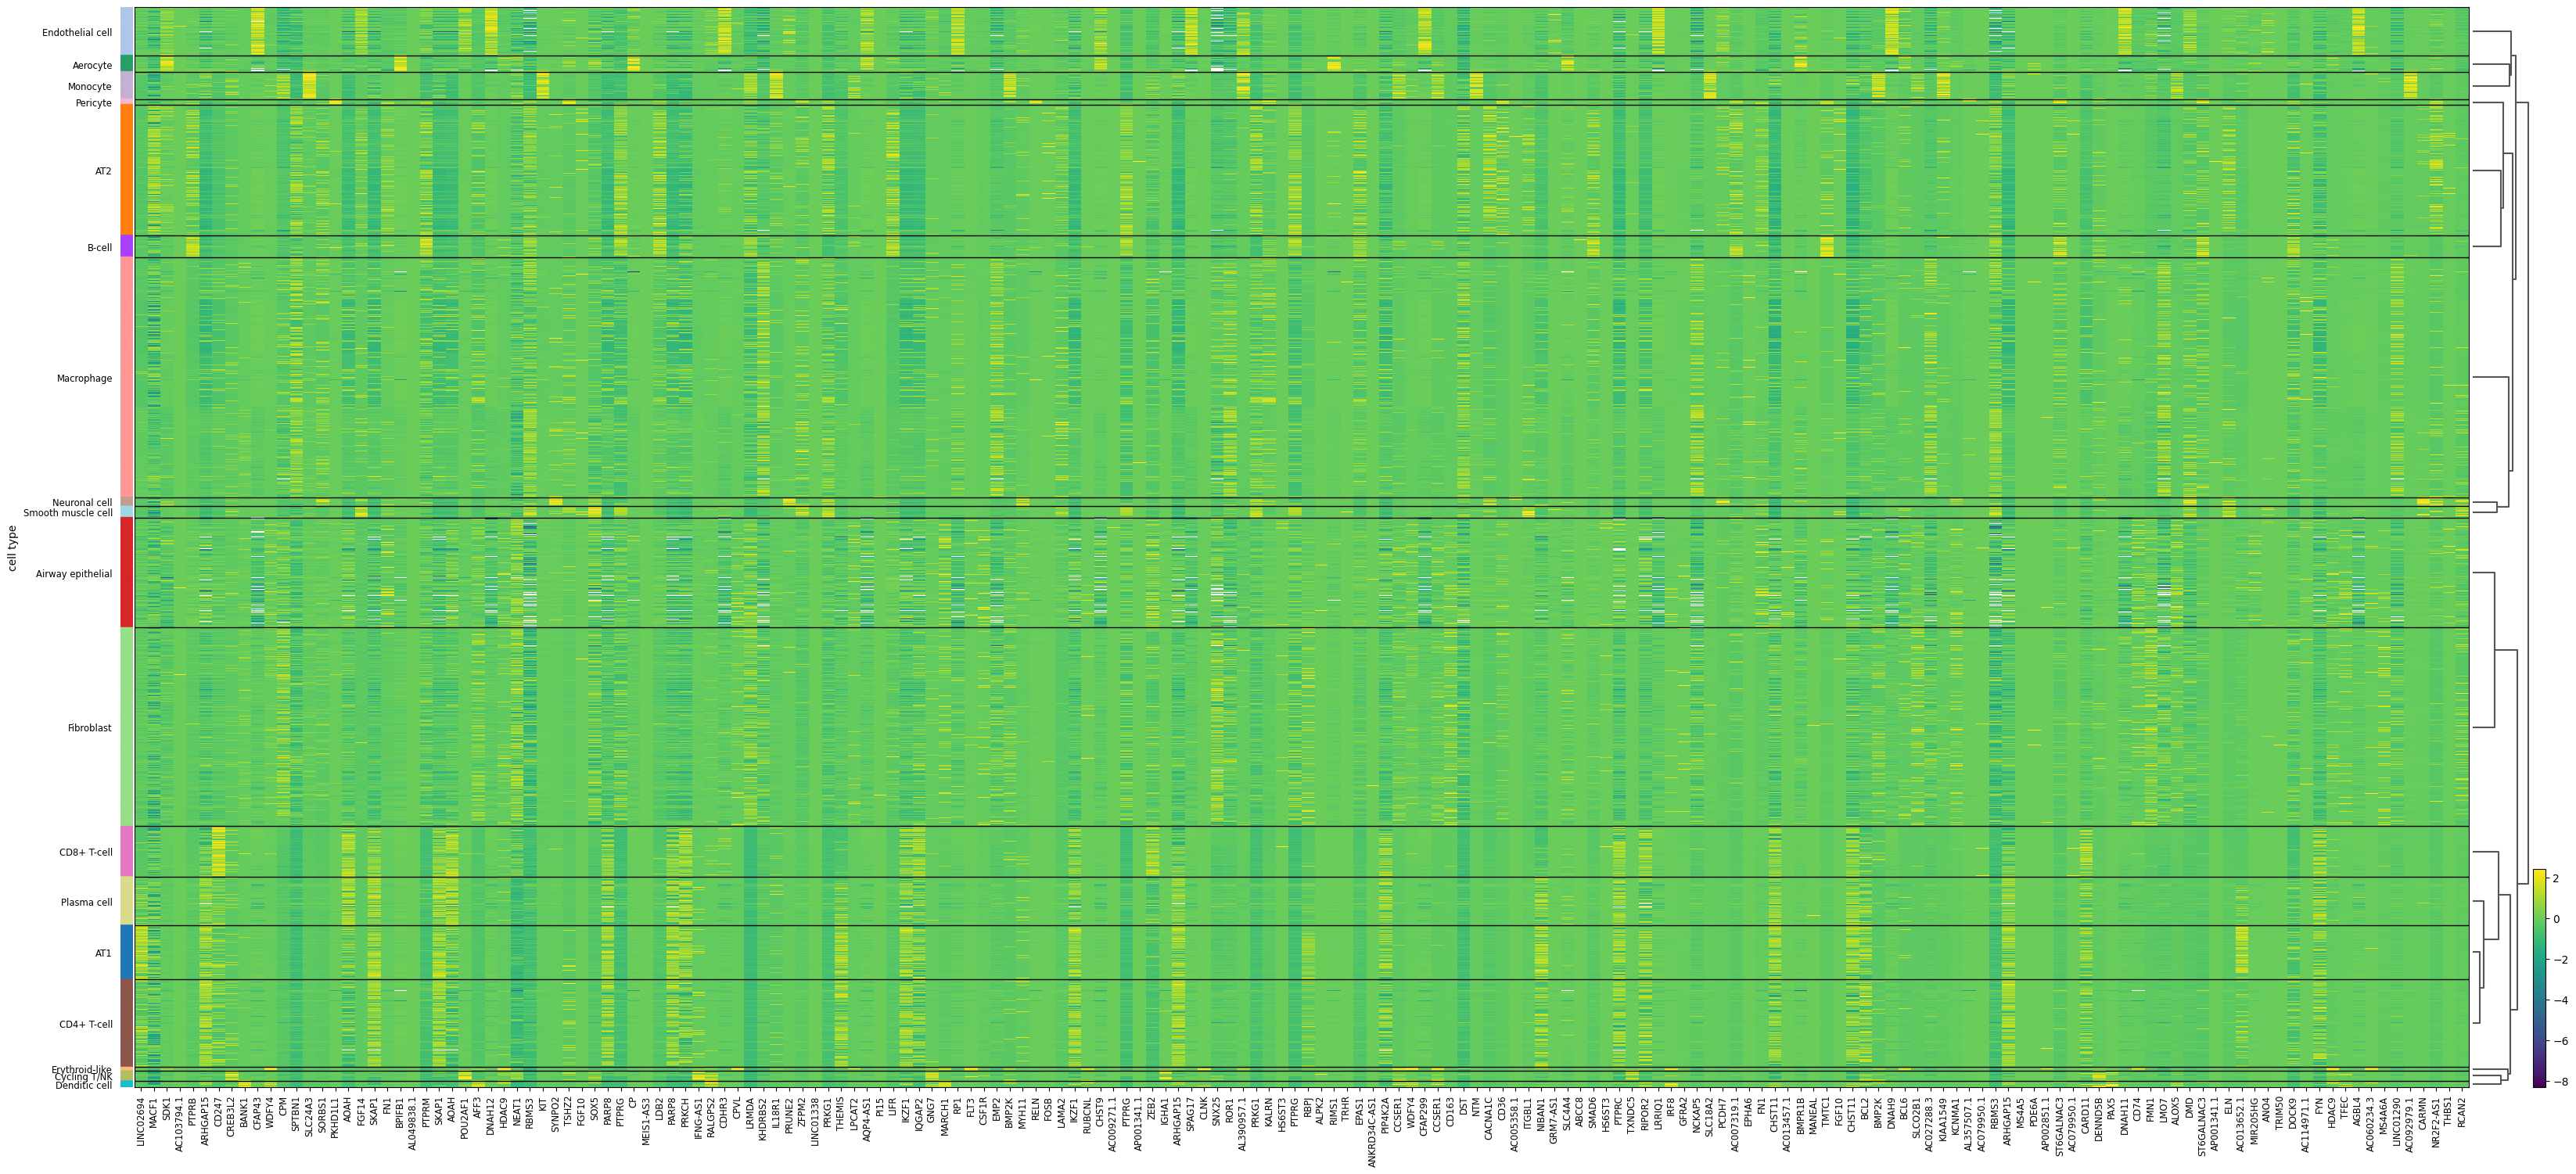

In [150]:
sc.pl.heatmap(
    adata,
    var_names=top_genes_list,
    groupby='cell type',
    show_gene_labels=True,
    dendrogram=True,
    swap_axes=False,
    cmap='viridis',
    use_raw=False,
    figsize=(40, 18)
)

In [153]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.5/548.5 kB 7.4 MB/s eta 0:00:00


#Gene Ontology (GO)

In [154]:
import gseapy as gp

In [158]:
enr = gp.enrichr(
    gene_list=top_genes_list,
    gene_sets=['GO_Biological_Process_2023', 'KEGG_2021_Human'],
    organism='Human'
)

# Visualize results
enr.results.head(10)

Gene_set  \
0  GO_Biological_Process_2023   
1  GO_Biological_Process_2023   
2  GO_Biological_Process_2023   
3  GO_Biological_Process_2023   
4  GO_Biological_Process_2023   
5  GO_Biological_Process_2023   
6  GO_Biological_Process_2023   
7  GO_Biological_Process_2023   
8  GO_Biological_Process_2023   
9  GO_Biological_Process_2023   

                                                Term Overlap   P-value  \
0  Enzyme-Linked Receptor Protein Signaling Pathw...   8/124  0.000007   
1                     B Cell Activation (GO:0042113)    7/92  0.000009   
2  Positive Regulation Of Peptidyl-Tyrosine Phosp...   8/130  0.000010   
3    Regulation Of Cell-Matrix Adhesion (GO:0001952)    6/65  0.000013   
4  Transmembrane Receptor Protein Tyrosine Kinase...  11/284  0.000018   
5      Mononuclear Cell Differentiation (GO:1903131)    4/24  0.000036   
6  Positive Regulation Of Signal Transduction (GO...  10/266  0.000055   
7         Regulation Of Kinase Activity (GO:0043549)    6/85  0.000060   
8  Regulation Of Peptidyl-Tyrosine Phosphorylatio...    6/90  0.000082   
9            Lymphocyte Differentiation (GO:0030098)    6/91  0.000088   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.004003            0                     0    9.008906   
1          0.004003            0                     0   10.703715   
2          0.004003            0                     0    8.563240   
3          0.004044            0                     0   13.148554   
4          0.004416            0                     0    5.327393   
5          0.007557            0                     0   25.575484   
6          0.009395            0                     0    5.134490   
7          0.009395            0                     0    9.809878   
8          0.011015            0                     0    9.223623   
9          0.011015            0                     0    9.114648   

   Combined Score                                              Genes  
0      107.265263          CSF1R;FLT3;CLNK;LIFR;ROR1;FYN;GFRA2;PTPRG  
1      124.668839               PTPRC;FLT3;BANK1;KIT;BCL2;PAX5;HDAC9  
2       98.973053         CSF1R;CD74;PTPRC;RELN;FLT3;BANK1;KIT;FGF10  
3      148.051572                    MACF1;EMP2;FYN;CD36;THBS1;SKAP1  
4       58.328041  CSF1R;EPHA6;FLT3;KIT;CLNK;ROR1;FYN;SORBS1;KALR...  
5      261.616502                              CSF1R;FLT3;IRF8;IKZF1  
6       50.369105  CD74;MACF1;RIMS1;RELN;PTPRC;LAMA2;BMP2K;EMP2;S...  
7       95.389834                     CSF1R;CD74;FLT3;EMP2;ROR1;LDB2  
8       86.732466                    CD74;RELN;PTPRC;BANK1;FYN;FGF10  
9       85.145510                    PTPRC;FLT3;KIT;IKZF1;PAX5;HDAC9

from matplotlib import pyplot as plt
_df_0['P-value'].plot(kind='hist', bins=20, title='P-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Adjusted P-value'].plot(kind='hist', bins=20, title='Adjusted P-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Odds Ratio'].plot(kind='hist', bins=20, title='Odds Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Combined Score'].plot(kind='hist', bins=20, title='Combined Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='P-value', y='Adjusted P-value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Adjusted P-value', y='Odds Ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Odds Ratio', y='Combined Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['P-value']
  ys = series['Odds Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('P-value', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('P-value')
_ = plt.ylabel('Odds Ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['P-value']
  ys = series['Combined Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('P-value', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('P-value')
_ = plt.ylabel('Combined Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['P-value']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'P-value'}, axis=1)
              .sort_values('P-value', ascending=True))
  xs = counted['P-value']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('P-value', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('P-value')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Adjusted P-value']
  ys = series['Odds Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Adjusted P-value', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Adjusted P-value')
_ = plt.ylabel('Odds Ratio')

from matplotlib import pyplot as plt
_df_11['P-value'].plot(kind='line', figsize=(8, 4), title='P-value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Adjusted P-value'].plot(kind='line', figsize=(8, 4), title='Adjusted P-value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Odds Ratio'].plot(kind='line', figsize=(8, 4), title='Odds Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Combined Score'].plot(kind='line', figsize=(8, 4), title='Combined Score')
plt.gca().spines[['top', 'right']].set_visible(False)

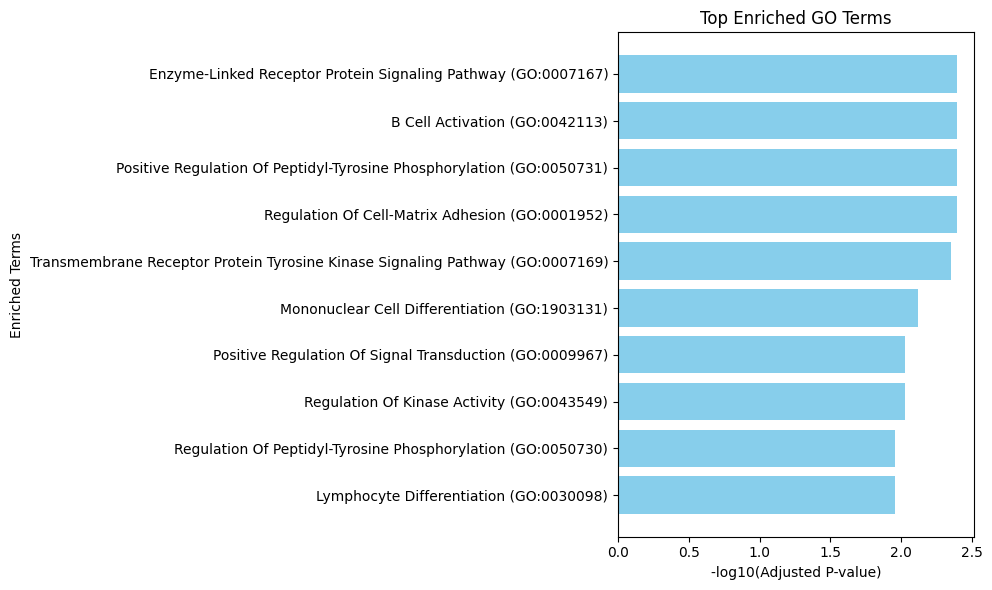

In [159]:
top_terms = enr.results.sort_values('Adjusted P-value').head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_terms['Term'], -np.log10(top_terms['Adjusted P-value']), color='skyblue')
plt.xlabel('-log10(Adjusted P-value)')
plt.ylabel('Enriched Terms')
plt.title('Top Enriched GO Terms')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

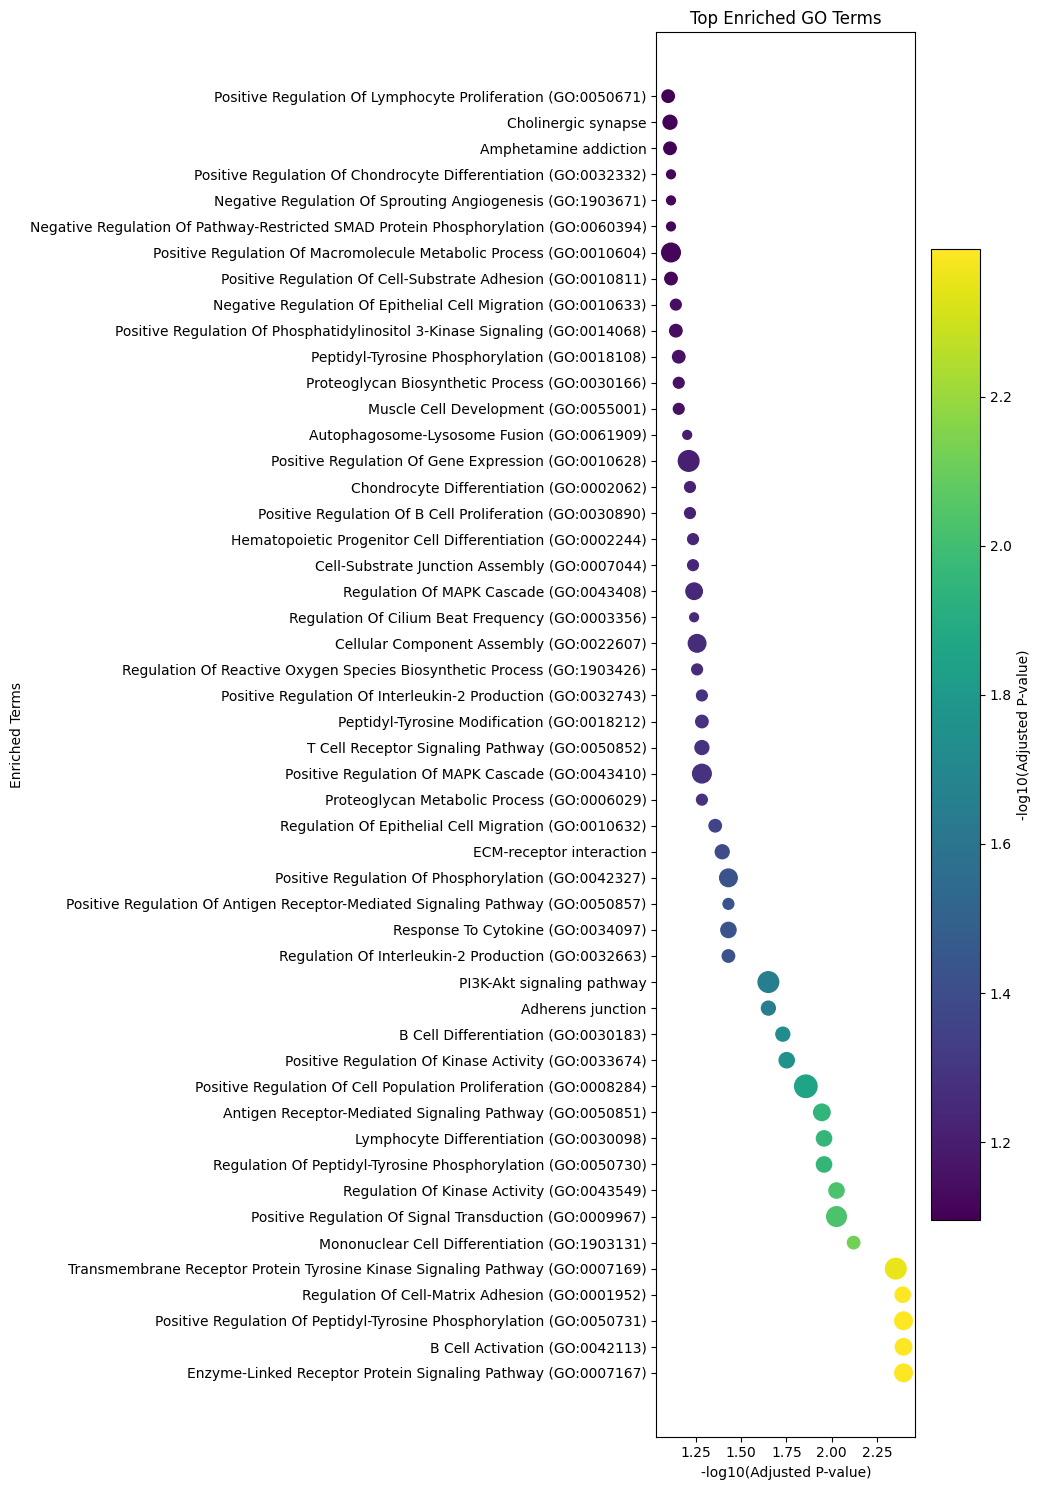

In [166]:
top_terms = enr.results.sort_values('Adjusted P-value').head(50)

# Create a dot plot
plt.figure(figsize=(10, 15))
plt.scatter(
    -np.log10(top_terms['Adjusted P-value']),  # x-axis: significance
    top_terms['Term'],  # y-axis: enriched terms
    s=top_terms['Overlap'].str.split('/').str[0].astype(int) * 20,  # Size: number of genes
    c=-np.log10(top_terms['Adjusted P-value']),  # Color: significance
    cmap='viridis'
)
plt.xlabel('-log10(Adjusted P-value)')
plt.ylabel('Enriched Terms')
plt.title('Top Enriched GO Terms')
plt.colorbar(label='-log10(Adjusted P-value)')
plt.tight_layout()
plt.show()

In [167]:
!pip install networkx pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.4 MB/s eta 0:00:00


In [168]:
import networkx as nx
from pyvis.network import Network

# Create a graph
G = nx.Graph()

# Add nodes and edges for top enriched terms and their genes
for _, row in enr.results.sort_values('Adjusted P-value').head(10).iterrows():
    term = row['Term']
    genes = row['Genes'].split(';')
    G.add_node(term, size=10, title=term)  # Add term as a node
    for gene in genes:
        G.add_node(gene, size=5, title=gene)  # Add gene as a node
        G.add_edge(term, gene)  # Add edge between term and gene

# Visualize the network
net = Network(notebook=True, height="500px", width="100%")
net.from_nx(G)
net.show("enrichment_network.html")

enrichment_network.html


In [179]:
import IPython.display as display

display.display(display.HTML(filename="/content/enrichment_network.html"))

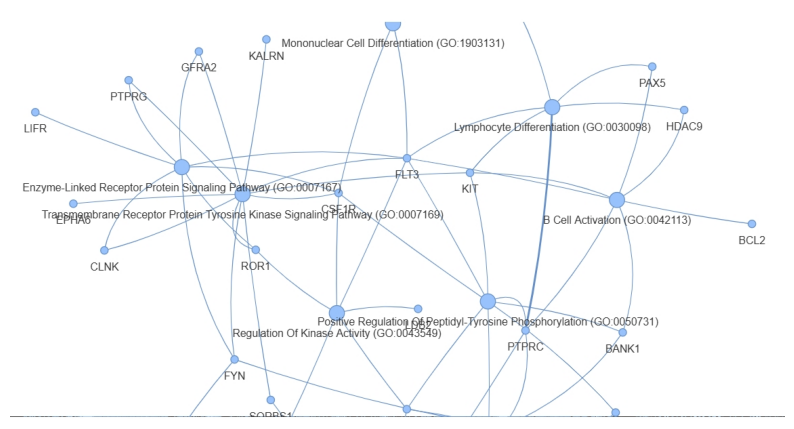

In [183]:
fig, ax = plt.subplots(figsize=(10, 10))
import matplotlib.image as mpimg
img = mpimg.imread('/content/GO network.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [199]:
adata.X

array([[ 0.09109239,  0.04316825,  0.0529102 , ...,  0.07607078,
        -0.0277464 ,  0.43308163],
       [ 0.12672401,  0.05205442, -0.31946424, ..., -0.57728117,
                nan, -0.00961168],
       [ 0.07035098,  0.03703954,  0.05704689, ...,  0.09377542,
        -0.02097917,  0.24143767],
       ...,
       [-0.07384071, -0.04213364, -0.02859952, ..., -0.43812104,
        -0.29410615,  1.65687081],
       [-0.14667526, -0.01528936,  0.045968  , ..., -0.23103769,
        -0.58921687, -0.28901277],
       [-0.07922972, -0.04289911,  0.00356589, ..., -0.11365787,
        -0.03593783, -0.17749124]])

In [202]:
import scipy
gene_expression = adata.X
if isinstance(gene_expression, scipy.sparse.csr_matrix):
    gene_expression = gene_expression.todense()
#########
df_gene_expression = pd.DataFrame(gene_expression,
                                  columns=adata.var_names,
                                  index=adata.obs_names)

In [203]:
df_gene_expression

CPTP  AL391244.2      VWA1  AL645728.1    FNDC10  \
CGTTCTGGTACTAGCT-1_1  0.091092    0.043168  0.052910    0.016346  0.038111   
CTGGCAGGTTCGGTAT-1_1  0.126724    0.052054 -0.319464    0.030117  0.054521   
ACACCAACACAACGCC-1_1  0.070351    0.037040  0.057047    0.012894  0.029763   
CCTCAACCATACAGGG-1_1  0.081391    0.034288  0.007716    0.012128  0.033032   
ACAAAGATCCACAGGC-1_1  0.074843    0.035255  0.052956    0.011678  0.030801   
...                        ...         ...       ...         ...       ...   
CGCCATTGTTTGCCGG-1_1 -0.071141   -0.041743 -0.045074   -0.030643 -0.033409   
CACTGGGGTCTACGTA-1_1 -0.079495   -0.043025  0.003487   -0.032604 -0.036599   
CATACTTGTAGAGGAA-1_1 -0.073841   -0.042134 -0.028600   -0.031276 -0.034439   
TTTGGTTTCCACGGAC-1_1 -0.146675   -0.015289  0.045968   -0.014038 -0.049354   
ATGCATGAGTCATGAA-1_1 -0.079230   -0.042899  0.003566   -0.032534 -0.036489   

                        CFAP74  AL590822.1     TTC34     AJAP1  AL365255.1  \
CGTTCTGGTACTAGCT-1_1 -0.325219    0.038698 -0.816603  0.017370    0.069387   
CTGGCAGGTTCGGTAT-1_1 -1.085465    0.060794       NaN  0.098719    0.085657   
ACACCAACACAACGCC-1_1 -0.272209    0.031252 -0.662694  0.006841    0.058625   
CCTCAACCATACAGGG-1_1 -0.358501    0.029872 -0.817815  0.015925    0.056463   
ACAAAGATCCACAGGC-1_1 -0.283666    0.029312 -0.682234  0.006233    0.056873   
...                        ...         ...       ...       ...         ...   
CGCCATTGTTTGCCGG-1_1 -0.086110   -0.058803  2.397895 -0.078313   -0.065559   
CACTGGGGTCTACGTA-1_1 -0.024574   -0.062234  0.021797 -0.092027   -0.068385   
CATACTTGTAGAGGAA-1_1 -0.065284   -0.059902 -0.027375 -0.082817   -0.066440   
TTTGGTTTCCACGGAC-1_1  0.067323   -0.030960  0.116057 -0.076496   -0.038470   
ATGCATGAGTCATGAA-1_1 -0.024935   -0.062086  0.021001 -0.091866   -0.068177   

                      ...    MT-CO1    MT-CO2   MT-ATP6    MT-CO3    MT-ND3  \
CGTTCTGGTACTAGCT-1_1  ...  0.330289  0.218091  0.024991  0.292416 -0.155195   
CTGGCAGGTTCGGTAT-1_1  ...       NaN       NaN       NaN       NaN       NaN   
ACACCAACACAACGCC-1_1  ...  0.359317  0.238337  0.131760  0.025113 -0.005051   
CCTCAACCATACAGGG-1_1  ...  0.843981  0.662572 -0.029494  0.547847 -0.282806   
ACAAAGATCCACAGGC-1_1  ...  0.337151  0.236282  0.089676  0.025471 -0.043391   
...                   ...       ...       ...       ...       ...       ...   
CGCCATTGTTTGCCGG-1_1  ... -3.988138 -1.796718  0.792350 -1.142354  1.449633   
CACTGGGGTCTACGTA-1_1  ... -0.298449 -0.193663 -0.149253 -0.041176 -0.024883   
CATACTTGTAGAGGAA-1_1  ... -1.347131 -0.953423 -1.194961 -0.629911 -0.989680   
TTTGGTTTCCACGGAC-1_1  ... -0.065450 -0.436571  0.199868 -0.300290  0.163827   
ATGCATGAGTCATGAA-1_1  ... -0.297034 -0.192778 -0.148816 -0.041029 -0.024887   

                       MT-ND4L    MT-ND4    MT-ND5    MT-ND6    MT-CYB  
CGTTCTGGTACTAGCT-1_1  0.071694  0.058635  0.076071 -0.027746  0.433082  
CTGGCAGGTTCGGTAT-1_1       NaN  0.629607 -0.577281       NaN -0.009612  
ACACCAACACAACGCC-1_1  0.080388 -0.011065  0.093775 -0.020979  0.241438  
CCTCAACCATACAGGG-1_1 -0.196034 -0.100663 -0.284961 -0.343703  0.249015  
ACAAAGATCCACAGGC-1_1  0.083614 -0.019852  0.092279  0.001363  0.237158  
...                        ...       ...       ...       ...       ...  
CGCCATTGTTTGCCGG-1_1 -0.449984 -1.092145 -0.650833 -0.453419 -1.100115  
CACTGGGGTCTACGTA-1_1 -0.077603 -0.056544 -0.114040 -0.036035 -0.178328  
CATACTTGTAGAGGAA-1_1 -0.309770  1.666429 -0.438121 -0.294106  1.656871  
TTTGGTTTCCACGGAC-1_1 -0.243138 -0.153041 -0.231038 -0.589217 -0.289013  
ATGCATGAGTCATGAA-1_1 -0.077308 -0.056455 -0.113658 -0.035938 -0.177491  

[5965 rows x 2000 columns]

#Gene Expression Prediction